<a href="https://colab.research.google.com/github/white091612/InceptionV3_HMNIST_skin/blob/main/ViT_HMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('Not using a high-RAM runtime')
# else:
#   print('You are using a high-RAM runtime!')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 드라이브 마운트 및 패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -U tensorflow-addons
!pip install comvex
!pip install -U keras-cv-attention-models
!pip install keras_cv

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.5/99.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 KB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.9/634.9 KB 10.6 MB/s eta 0:00:00


# Optimizer(Lion) 다운로드

In [ ]:
cd /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/model

/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/model


In [ ]:
!git clone https://github.com/google/automl.git

fatal: destination path 'automl' already exists and is not an empty directory.


In [ ]:
cp /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/model/maxvit_tiny_224_imagenet.h5 /usr/local/lib/python3.9/dist-packages/keras/models/maxvit_tiny_224_imagenet.h5

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras import backend as K
from automl.lion import lion_tf2
from keras_cv_attention_models import maxvit
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_cv
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import random
from keras_cv_attention_models import efficientnet
from sklearn.metrics import confusion_matrix

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


In [ ]:
tf.__version__

'2.11.0'

# 데이터 로드 및 전처리

In [ ]:
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
# X_train = np.load(dataset_path+"/X6_train_resampled(random)_label_corrected.npy")
# y_train = np.load(dataset_path+'/y6_train_resampled(random)_label_corrected.npy')
X_val = np.load(dataset_path+"/X6_val.npy")
y_val = np.load(dataset_path+"/y6_val.npy")


aug_model = keras.Sequential()
aug_model.add(layers.Normalization())
# aug_model.add(layers.Cropping2D(((1,1),(1,1))))

X_val = aug_model(X_val)


# undersampler = RandomUnderSampler()
# x_resampled, y_resampled = undersampler.fit_resample(X_train.reshape(len(X_train),-1), y_train)
# x_train_resampled=x_resampled.reshape(-1, 226, 226, 3)
# y_train_resampled=y_resampled
# 원본 데이터 + 언더샘플 데이터의 augment 로 학습한 결과는 아래와 같이 처참하다

# (/ViT_best_model(augOnly)_valNorm.h5)
# Epoch 100: val_f1_m did not improve from 0.45163
# loss: 0.1732 - accuracy: 0.7314 - f1_m: 0.5797 - precision_m: 0.8368 - recall_m: 0.4460
# val_loss: 0.3580 - val_accuracy: 0.5220 - val_f1_m: 0.3921 - val_precision_m: 0.3155 - val_recall_m: 0.5240



# 랜덤으로 선택 될 augmentation layers


# random_state = np.random.randint(1,9999)
# X_train_sample, _, y_train_sample, _ = train_test_split(X_train, 
#                                                         y_train, 
#                                                         test_size=0.4, 
#                                                         random_state=random_state)



# OOM 때문에 10000개씩 분할 작업
#### 각 셀마다 실행하면서 런타임 종료 시 재시작

In [ ]:
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
X_train = np.load(dataset_path+"/X6_train_resampled(random)_label_corrected.npy")
y_train = np.load(dataset_path+'/y6_train_resampled(random)_label_corrected.npy')
aug_model = keras.Sequential([
    keras_cv.layers.RandomColorDegeneration((0.1,0.8)),
    keras_cv.layers.AutoContrast([0,1]),
    keras_cv.layers.RandomCutout(0.9, 0.9, fill_mode="gaussian_noise"),
    keras_cv.layers.RandomHue((0.3,0.7), [0,1])
])

In [ ]:
X_temp = X_train[:10000]
X_temp = aug_model(X_temp)
X_temp = X_temp.numpy()
np.save(dataset_path+"/X6_temp_train_1.npy",X_temp)

In [ ]:
X_temp = X_train[10000:20000]
X_temp = aug_model(X_temp)
X_temp = X_temp.numpy()
np.save(dataset_path+"/X6_temp_train_2.npy",X_temp)

In [ ]:
X_temp = X_train[20000:]
X_temp = aug_model(X_temp)
X_temp = X_temp.numpy()
np.save(dataset_path+"/X6_temp_train_3.npy",X_temp)

In [ ]:
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
X_train = np.load(dataset_path+"/X6_train_resampled(random)_label_corrected.npy")
X_temp1 = np.load(dataset_path+"/X6_temp_train_1.npy")
X_train = np.concatenate((X_train,X_temp1))
del X_temp1
X_temp2 = np.load(dataset_path+"/X6_temp_train_2.npy")
X_train = np.concatenate((X_train,X_temp2))
del X_temp2
X_temp3 = np.load(dataset_path+"/X6_temp_train_3.npy")
X_train = np.concatenate((X_train,X_temp3))
del X_temp3

In [ ]:
np.save(dataset_path+"/X6_train_resampled(random)_label_corrected_aug.npy",X_train)
y_train = np.concatenate((y_train,y_train))
np.save(dataset_path+"/y6_train_resampled(random)_label_corrected_aug.npy",y_train)

In [ ]:
X_temp = X_train[:10000]
X_temp = aug_model(X_temp)
X_temp = X_temp.numpy()
X_train = np.concatenate((X_train,X_temp))

# Augmentation 적용된 데이터 Split
### X_train : Normalization, Augmentation
### X_val : Normalization
### X_test : Normalization



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
X_train = np.load(dataset_path+"/X6_train_resampled(random)_label_corrected_aug.npy")
y_train = np.load(dataset_path+'/y6_train_resampled(random)_label_corrected_aug.npy')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create an array of labels, one for each data point

# Use StratifiedShuffleSplit to split the data into two subsets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=59)
train_indices, test_indices = next(splitter.split(X=X_train, y=y_train))

# Split the data using the indices returned by StratifiedShuffleSplit
X_train_split1, X_train_split2 = X_train[train_indices], X_train[test_indices]
y_train_split1, y_train_split2 = y_train[train_indices], y_train[test_indices]

In [ ]:
np.save(dataset_path+"/X6_train_resampled(random)_label_corrected_aug_1.npy",X_train_split1)
np.save(dataset_path+"/X6_train_resampled(random)_label_corrected_aug_2.npy",X_train_split2)
np.save(dataset_path+"/y6_train_resampled(random)_label_corrected_aug_1.npy",y_train_split1)
np.save(dataset_path+"/y6_train_resampled(random)_label_corrected_aug_2.npy",y_train_split2)

In [ ]:
# dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'

# # Load the data and labels from the .npy files
# # x = np.load(dataset_path + "/skinCancer_dataset.npy")
# # y = np.load(dataset_path + "/skinCancer_labels.npy")
# x = np.load(dataset_path + "/skinCancer_dataset_226.npy")
# y = np.load(dataset_path + "/skinCancer_labels_226.npy")

# y_labels = {
#     'akiec': 1,  # 악성
#     'bcc': 1,  # 악성
#     'bkl': 0,  # 악성
#     'df': 0,  # 양성
#     'nv': 0,  # 양성
#     'vasc': 0,  # 양성
#     'mel': 1  # 악성
# }
# y = np.array(list(map(y_labels.get, y)))
# # Split the data into train, validation, and test sets
# random_state = np.random.randint(1,9999)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
# random_state = np.random.randint(1,9999)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=random_state)

# aug_model = keras.Sequential()
# aug_model.add(layers.Normalization())
# aug_model.add(layers.Resizing(224,224))

# X_val = aug_model(X_val)
# X_test = aug_model(X_test)

# print(X_train.shape)
# print(Counter(y_train))
# print(X_val.shape)
# print(Counter(y_val))
# print(X_test.shape)
# print(Counter(y_test))

# EXPERIMENT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -U tensorflow-addons
!pip install comvex
!pip install -U keras-cv-attention-models
!pip install keras_cv
!cd /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras import backend as K
from automl.lion import lion_tf2
from keras_cv_attention_models import maxvit
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_cv
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import random
from keras_cv_attention_models import efficientnet
from sklearn.metrics import confusion_matrix

dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'

X_train = np.load(dataset_path+"/X6_train_resampled(adasyn)_label_corrected.npy")
y_train = np.load(dataset_path+'/y6_train_resampled(adasyn)_label_corrected.npy')
X_val = np.load(dataset_path+"/X6_val.npy")
y_val = np.load(dataset_path+"/y6_val.npy")
aug_model = keras.Sequential()
aug_model.add(layers.Normalization())
X_val = aug_model(X_val)

from keras_cv_attention_models import maxvit
# base_model = tf.keras.applications.ResNet152V2(weights = 'imagenet',
#                                                include_top=False,
#                                                classes=7,
#                                                input_shape=(224,224,3))
# out = base_model.output
# out = layers.GlobalAveragePooling2D()(out)
# out = layers.Dropout(0.5)(out)
# output = layers.Dense(7, activation="softmax")(out)
# base_model = keras.models.Model(inputs=base_model.input, outputs=output)

base_model = maxvit.MaxViT_Base(input_shape=(224,224,3),
                                 num_classes=7,
                                 pretrained='imagenet')

for layer in base_model.layers[:int(len(base_model.layers)*0.9)]:
    layer.trainable=False

batch_size = 64
num_epochs = 30
optimizer = lion_tf2.Lion()

classes = {
    0: ('akiec', 'actinic keratosis and intraepithelial carcinomae'),  # 악성
    1: ('bcc', 'basal cell carcinoma'),  # 악성
    2: ('bkl', 'benign keratosis-like lesions'),  # 양성
    3: ('df', 'dermatofibroma'),  # 양성
    4: ('nv', ' melanocytic nevi'),  # 양성
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),  # 양성
    6: ('mel', 'melanoma'),  # 악성
}

callback = keras.callbacks.ModelCheckpoint(filepath=dataset_path+'/ViTL_best_model(6-1_adasyn_label_corrected)_valNorm.h5',
                                           monitor='val_accuracy', # 'val_f1_m
                                           mode='max',
                                           verbose=1,
                                           save_best_only=True)

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']) # ['accuracy', f1_m, precision_m, recall_m]

start_time = datetime.now()
history = base_model.fit(X_train,
                    y_train,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=num_epochs,
                    shuffle=True,
                    callbacks=[callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.
483445568/483445568 [==============================] - 5s 0us/step
>>>> Load pretrained from: /root/.keras/models/maxvit_base_224_imagenet.h5


Epoch 1/30
511/511 [==============================] - ETA: 0s - loss: 1.7701 - accuracy: 0.2994
Epoch 1: val_accuracy improved from -inf to 0.36128, saving model to /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000/ViTL_best_model(6-1_adasyn_label_corrected)_valNorm.h5
511/511 [==============================] - 401s 638ms/step - loss: 1.7701 - accuracy: 0.2994 - val_loss: 1.6924 - val_accuracy: 0.3613
Epoch 2/30
511/511 [==============================] - ETA: 0s - loss: 1.6232 - accuracy: 0.3671
Epoch 2: val_accuracy improved from 0.36128 to 0.41517, saving model to /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000/ViTL_best_model(6-1_adasyn_label_corrected)_valNorm.h5
511/511 [==============================] - 305s 597ms/step - loss: 1.6232 - accuracy: 0.3671 - val_loss: 1.4538 - val_accuracy: 0.4152
Epoch 3/30
511/511 [==============================] - ETA: 0s - loss: 1.4662 - accura

In [ ]:
import pickle
with open(dataset_path+'/MaxViTLL_6trainHistoryDict_valNorm', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
from keras_cv_attention_models import cotnet
base_model = tf.keras.applications.ResNet152V2(weights = 'imagenet',
                                               include_top=False,
                                               classes=7,
                                               input_shape=(224,224,3))
out = base_model.output
out = layers.GlobalAveragePooling2D()(out)
out = layers.Dropout(0.5)(out)
output = layers.Dense(7, activation="softmax")(out)
base_model = keras.models.Model(inputs=base_model.input, outputs=output)

# base_model = cotnet.CotNetSE152D(input_shape=(224,224,3),
#                                  num_classes=7,
#                                  pretrained='imagenet')

for layer in base_model.layers[:int(len(base_model.layers)*0.9)]:
    layer.trainable=False

batch_size = 64
num_epochs = 30
optimizer = lion_tf2.Lion()

classes = {
    0: ('akiec', 'actinic keratosis and intraepithelial carcinomae'),  # 악성
    1: ('bcc', 'basal cell carcinoma'),  # 악성
    2: ('bkl', 'benign keratosis-like lesions'),  # 양성
    3: ('df', 'dermatofibroma'),  # 양성
    4: ('nv', ' melanocytic nevi'),  # 양성
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),  # 양성
    6: ('mel', 'melanoma'),  # 악성
}

callback = keras.callbacks.ModelCheckpoint(filepath=dataset_path+'/CoAt_best_model(6-1_random_label_corrected)_valNorm.h5',
                                           monitor='val_accuracy', # 'val_f1_m
                                           mode='max',
                                           verbose=1,
                                           save_best_only=True)

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']) # ['accuracy', f1_m, precision_m, recall_m]

start_time = datetime.now()
history = base_model.fit(X_train,
                    y_train,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=num_epochs,
                    shuffle=True,
                    callbacks=[callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Epoch 1/30
511/511 [==============================] - ETA: 0s - loss: 1.6109 - accuracy: 0.3406
Epoch 1: val_accuracy improved from -inf to 0.12475, saving model to /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000/CoAt_best_model(6-1_random_label_corrected)_valNorm.h5
511/511 [==============================] - 62s 92ms/step - loss: 1.6109 - accuracy: 0.3406 - val_loss: 2.5675 - val_accuracy: 0.1248
Epoch 2/30
510/511 [============================>.] - ETA: 0s - loss: 1.3417 - accuracy: 0.4706
Epoch 2: val_accuracy improved from 0.12475 to 0.14471, saving model to /content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000/CoAt_best_model(6-1_random_label_corrected)_valNorm.h5
511/511 [==============================] - 43s 85ms/step - loss: 1.3418 - accuracy: 0.4706 - val_loss: 2.5238 - val_accuracy: 0.1447
Epoch 3/30
510/511 [============================>.] - ETA: 0s - loss: 1.1269 - accuracy: 

KeyboardInterrupt: ignored

# Split 데이터 로드


In [ ]:
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
X_train = np.load(dataset_path+"/X6_train_resampled(random)_label_corrected_aug_1.npy")
y_train = np.load(dataset_path+'/y6_train_resampled(random)_label_corrected_aug_1.npy')
X_val = np.load(dataset_path+"/X6_val.npy")
y_val = np.load(dataset_path+"/y6_val.npy")

# 모델 빌드

In [ ]:
base_model=maxvit.MaxViT_Tiny(
    num_classes=7,
    classifier_activation='softmax',
    pretrained='imagenet',
    dropout=0.7,
    drop_connect_rate=0.5,
    input_shape=(224,224,3))

126113280/126113280 [==============================] - 3s 0us/step
>>>> Load pretrained from: /root/.keras/models/maxvit_tiny_224_imagenet.h5


In [ ]:
from keras_cv_attention_models import efficientnet
base_model = efficientnet.EfficientNetV2M(input_shape=(224,224,3),
                                      num_classes=7,
                                      pretrained='imagenet')

# out = base_model.output
# out = layers.GlobalAveragePooling2D()(out)
# output = layers.Dense(1, activation='sigmoid')(out)
# eff2_model = keras.models.Model(inputs=base_model.input, outputs=output)
# eff2_model = base_model

219746704/219746704 [==============================] - 1s 0us/step
>>>> Load pretrained from: /root/.keras/models/efficientnetv2/efficientnetv2-m-imagenet.h5


In [ ]:
from keras_cv_attention_models import cotnet
base_model = cotnet.CotNetSE152D(input_shape=(224,224,3),
                                 num_classes=7,
                                 pretrained='imagenet')

>>>> No pretrained available, model will be randomly initialized


In [ ]:
base_model = tf.keras.applications.EfficientNetV2L(weights = 'imagenet',
                                                   include_top=False,
                                                   classes=7,
                                                   input_shape=(224,224,3))
# out = base_model.output
# out = layers.GlobalAveragePooling2D()(out)
# out = layers.
# eff2_model = keras.models.Model(inputs=base_model.input, outputs=output)
# eff2_model = base_model

In [ ]:
for layer in base_model.layers[:int(len(base_model.layers)*0.9)]:
    layer.trainable=False

In [ ]:
for i in range(5,0,-1):
  print(base_model.layers[-i].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='stack_4_block_2_ffn_2_conv/Conv2D:0', description="created by layer 'stack_4_block_2_ffn_2_conv'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='stack_4_block_2_ffn_drop/Identity:0', description="created by layer 'stack_4_block_2_ffn_drop'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='stack_4_block_2_ffn_output/add:0', description="created by layer 'stack_4_block_2_ffn_output'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")


In [ ]:
batch_size = 64
num_epochs = 30

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
optimizer = lion_tf2.Lion()
# optimizer = keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.001)

In [ ]:
classes = {
    0: ('akiec', 'actinic keratosis and intraepithelial carcinomae'),  # 악성
    1: ('bcc', 'basal cell carcinoma'),  # 악성
    2: ('bkl', 'benign keratosis-like lesions'),  # 양성
    3: ('df', 'dermatofibroma'),  # 양성
    4: ('nv', ' melanocytic nevi'),  # 양성
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),  # 양성
    6: ('mel', 'melanoma'),  # 악성
}

callback = keras.callbacks.ModelCheckpoint(filepath=dataset_path+'/CoAt_best_model(6-1_random_label_corrected)_valNorm.h5',
                                           monitor='val_accuracy', # 'val_f1_m
                                           mode='max',
                                           verbose=1,
                                           save_best_only=True)

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']) # ['accuracy', f1_m, precision_m, recall_m]

start_time = datetime.now()
history = base_model.fit(X_train,
                    y_train,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=num_epochs,
                    shuffle=True,
                    callbacks=[callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


In [ ]:
# !pip install numba
from numba import cuda 
device = cuda.get_current_device()
device.reset()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
with open(dataset_path+'/EffV2L_6trainHistoryDict_valNorm', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
from google.colab import runtime
runtime.unassign()

# 모델 Evaluate

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras import backend as K
from automl.lion import lion_tf2
from keras_cv_attention_models import maxvit
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_cv
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import random
from keras_cv_attention_models import efficientnet
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
import pickle
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
# pickle.load(dataset_path+'/EffV2M_trainHistoryDict_valNorm')
with open(dataset_path+'/EffV2M_trainHistoryDict_valNorm', "rb") as file:
    read_variables = pickle.load(file)
history = pd.DataFrame({'history':read_variables})

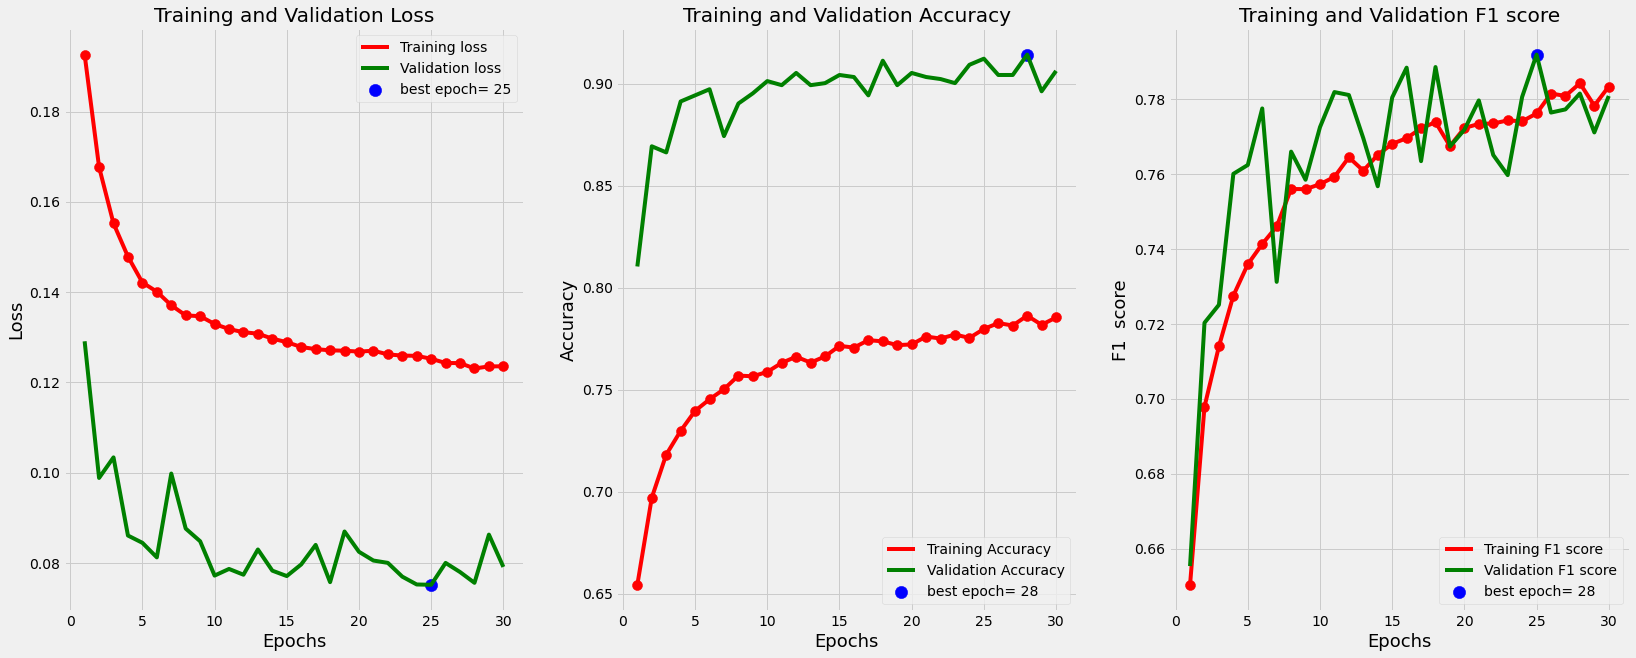

In [ ]:
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['f1_m']
    vf1=tr_data.history['val_f1_m']    
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    indexf1=np.argmax(vf1)
    vf1_highest=vf1[indexf1]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch) 
    f1_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')    
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)    
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()    
    plt.tight_layout    
    plt.show()
    return 

tr_plot(history)

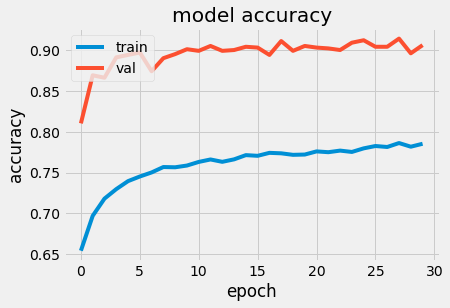

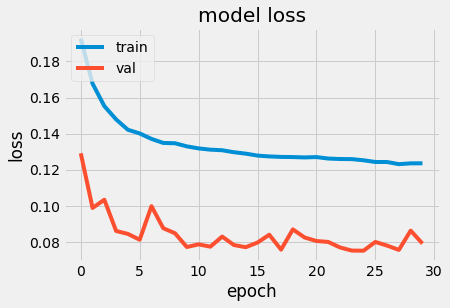

In [ ]:
# plot of accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
dataset_path

'/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'

In [ ]:
model = eff2_model
X_test = np.load(dataset_path+"/X6_test.npy")
y_test = np.load(dataset_path+"/y6_test.npy")
X_test = aug_model(X_test)
print(X_test.shape)
print(Counter(y_test))
loss, acc, f1, precision, recall = model.evaluate(X_test, y_test, verbose=2)

print(Counter(y_test))
y_pred = model.predict(X_test)
def predictionJudge(x):
  return 1 if x>=0.5 else 0
y_pred = np.array([predictionJudge(y) for y in y_pred])
print(Counter(y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(conf_mat / np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


NameError: ignored

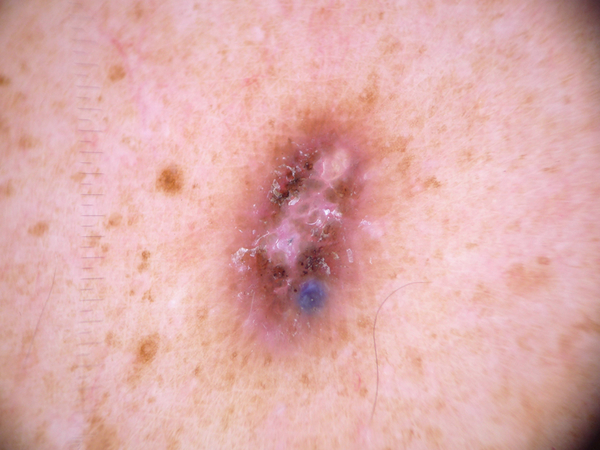

1/1 [==============================] - 0s 84ms/step
[[0.1335455]]
이 점은 86.65% 의 확률로 양성종양 입니다.


In [ ]:
import PIL
image = PIL.Image.open(dataset_path+'/HAM10000_images_part_1/ISIC_0027008.jpg')
image.show()
image = image.resize((224, 224))
img = X_test[1]
img = np.array(image).reshape(-1, 224, 224, 3)
result = eff2_model.predict(img)
print(result)
result = result.tolist()
result_class = "악성" if result[0][0] >= 0.5 else "양성"
result_prob =  result[0][0] if result[0][0] >= 0.5 else 1-result[0][0]
print(f"이 점은 {round(result_prob*100,2)}% 의 확률로 {result_class}종양 입니다.")

In [ ]:
base_model = efficientnet.EfficientNetV2L(input_shape=(224,224,3),
                                      num_classes=0,
                                      pretrained='imagenet')
out = base_model.output
out = layers.GlobalAveragePooling2D()(out)
output = layers.Dense(1, activation='sigmoid')(out)
eff2_model = keras.models.Model(inputs=base_model.input, outputs=output)
optimizer = lion_tf2.Lion()
eff2_model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy',f1_m,precision_m, recall_m])

eff2_model.load_weights(dataset_path+'/Eff2L_best_model(random_label_corrected)_valNorm.h5')

>>>> Load pretrained from: /root/.keras/models/efficientnetv2/efficientnetv2-l-imagenet.h5


In [ ]:
def myResize(im, h, w):
  width, height = im.size   # Get dimensions

  left = (width - 450)/2
  top = (height - 450)/2
  right = (width + 450)/2
  bottom = (height + 450)/2

  # Crop the center of the image
  return im.crop((left, top, right, bottom)).resize((h, w))

In [ ]:
X_test = np.load(dataset_path+"/X_test.npy")
y_test = np.load(dataset_path+"/y_test.npy")

In [ ]:
import random

In [ ]:
len(X_test)

2003

In [ ]:
random.sample(list(range(len(X_test))), 9)

[197, 1165, 1749, 1391, 1583, 1156, 1682, 1853, 1510]

In [ ]:
X_test[random.sample(list(range(len(X_test))), 9)]

[196, 209, 1582, 960, 1478, 1783, 378, 177, 1816]

In [ ]:
import os
from PIL import Image
dataset = []
img_ids = np.array([])
labels = []
folder_name=['HAM10000_images_part_1','HAM10000_images_part_2']
for folder in folder_name:
    img_dir_name = os.path.join(dataset_path, folder)
    files = glob.glob(img_dir_name + '/*')
    for file in files:
        img = Image.open(file)
        img = img.convert('RGB')
        img = myResize(img,226,226)
        img = np.array(img)
        img = keras.layers.Resizing(224,224)(img)
        for X_idx in random.sample(list(range(len(X_test))), 9):
          if np.array_equal(X_test[X_idx], np.array(img)):
            img_ids.append(file)
            print(img_ids)

[]


In [ ]:
img[0].shape

(224, 224, 3)

In [ ]:
X_test.index

AttributeError: ignored

(1, 226, 226, 3)
(1, 224, 224, 3)


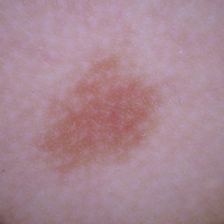

In [ ]:
from tensorflow import keras
resizeImg = np.array(myResize(Image.open(file).convert('RGB'),226,226))
print(resizeImg.reshape(1,226,226,3).shape)
resizeImg = keras.layers.Cropping2D(((1,1),(1,1)))(resizeImg.reshape(1,226,226,3))
print(resizeImg.shape)
Image.fromarray(np.array(resizeImg).reshape(224,224,3),"RGB")

(1, 226, 226, 3)
(226, 226, 3)


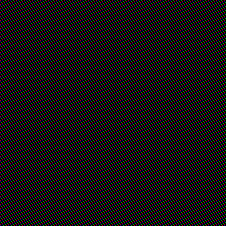

In [ ]:
from tensorflow import keras
resizeImg = np.array(myResize(Image.open(file).convert('RGB'),226,226))
print(resizeImg.reshape(1,226,226,3).shape)
resizeImg = keras.layers.Resizing(224,224)(resizeImg)
resizeImg = keras.layers.Resizing(226,226)(resizeImg)
print(resizeImg.shape)
Image.fromarray(np.array(resizeImg),"RGB")

1/1 [==============================] - 1s 542ms/step


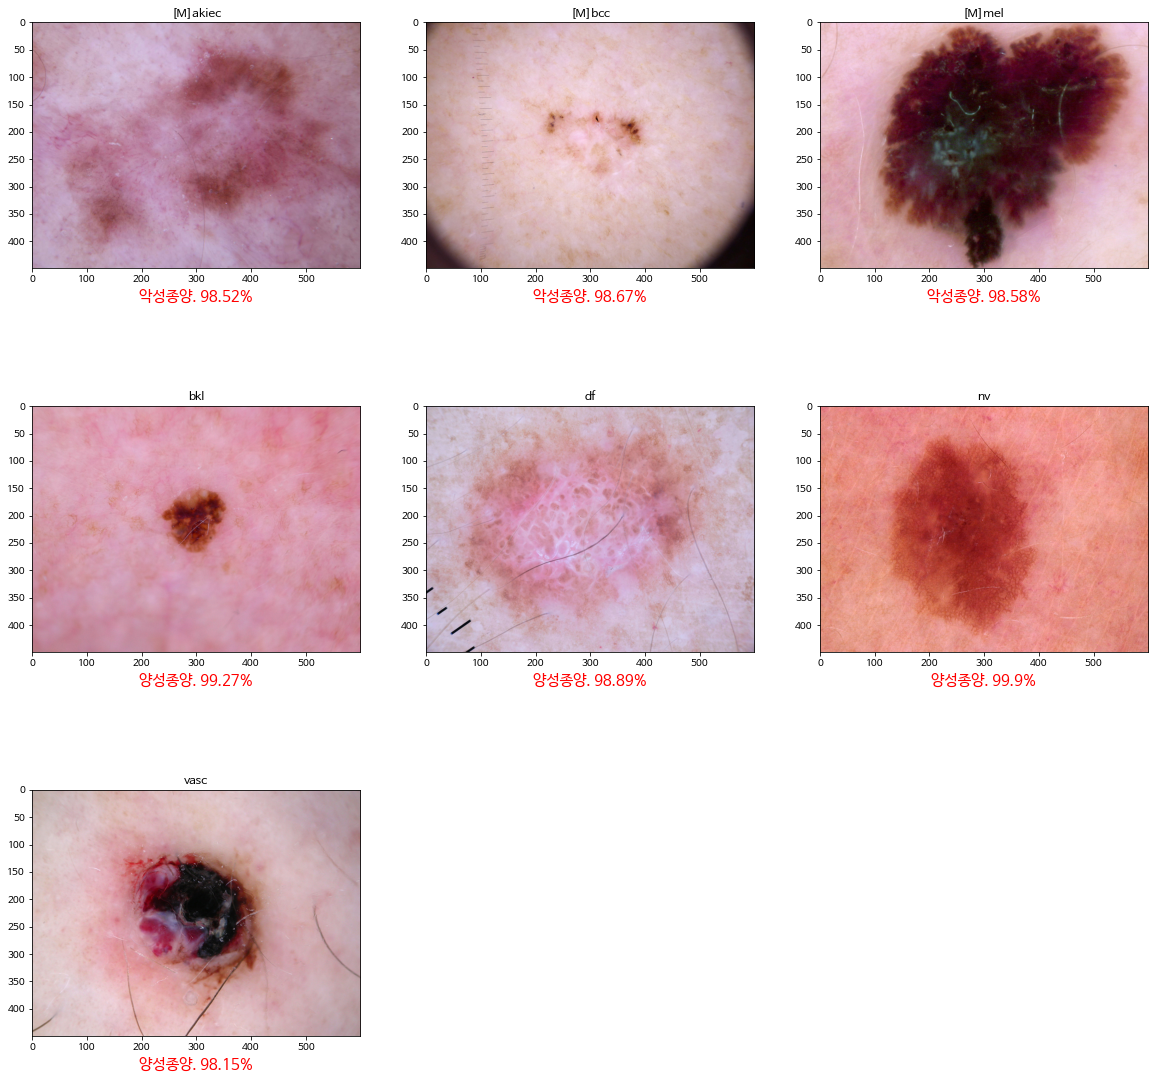

In [ ]:
from keras.utils.image_utils import load_img, img_to_array

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

plt.rc('font', family='NanumBarunGothic')

# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
labels = ["[M]akiec","[M]bcc","[M]mel",
          "bkl","df","nv","vasc"]
images_originals = [("ISIC_0030175",'2'),("ISIC_0029755",'2'),("ISIC_0028965",'1'),
                    ("ISIC_0031029",'2'),("ISIC_0030427",'2'),("ISIC_0031282",'2'),("ISIC_0033031",'2')]

# 주피터 노트북 상에서 보여질 이미지의 크기 
plt.figure(figsize=(20,20))

# 원본 이미지를 주피터 노트북에서 보이게 하기
for i, (image_o, idx) in enumerate(images_originals):
    plt.subplot(3, 3, i + 1)
    image = PIL.Image.open(dataset_path+'/HAM10000_images_part_'+idx+'/{}.jpg'.format(image_o))
    plt.imshow(image)
    img = myResize(image, 224, 224)
    img = np.array(img) / 255.0
    img = img.reshape(-1, 224, 224, 3)
    result = eff2_model.predict(img)
    result = result.tolist()
    result_class = "악성" if result[0][0] >= 0.5 else "양성"
    result_prob =  result[0][0] if result[0][0] >= 0.5 else 1-result[0][0]
    plt.title(labels[i])
    explain=f"{result_class}종양. {round(result_prob*100,2)}%"
    plt.xlabel(explain, color='red', size=15)

['/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/filnal_test/136547_135498_2118.jpg', '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/filnal_test/49773_45680_1233.jpg', '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/filnal_test/melanoma.jpg']
1/1 [==============================] - 1s 533ms/step


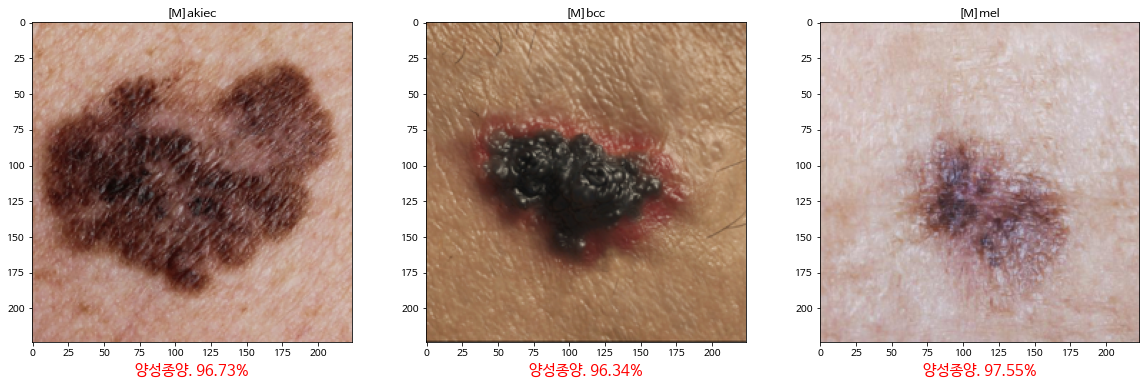

In [ ]:
from keras.utils.image_utils import load_img, img_to_array

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

plt.rc('font', family='NanumBarunGothic')

# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
labels = ["[M]akiec","[M]bcc","[M]mel",
          "bkl","df","nv","vasc"]
images_originals = ["ISIC_0030175","ISIC_0029755","ISIC_0032313",
                    "ISIC_0031029","ISIC_0030427","ISIC_0031282","ISIC_0033031"]

# 주피터 노트북 상에서 보여질 이미지의 크기 
plt.figure(figsize=(20,20))

# 원본 이미지를 주피터 노트북에서 보이게 하기
files = glob.glob('/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/filnal_test/*.jpg')
print(files)
for i, image_o in enumerate(files):
    plt.subplot(3, 3, i + 1)
    image = PIL.Image.open(image_o)
    img = myResize(image, 224, 224)
    plt.imshow(img)
    img = np.array(img) / 255.0
    img = img.reshape(-1, 224, 224, 3)
    result = eff2_model.predict(img)
    result = result.tolist()
    result_class = "악성" if result[0][0] >= 0.5 else "양성"
    result_prob =  result[0][0] if result[0][0] >= 0.5 else 1-result[0][0]
    plt.title(labels[i])
    explain=f"{result_class}종양. {round(result_prob*100,2)}%"
    plt.xlabel(explain, color='red', size=15)

In [ ]:
img = load_img(dataset_path+'/HAM10000_images_part_2/ISIC_0029915.jpg', target_size=(224, 224))

In [ ]:
# XAI알고리즘을 불러오는 부분입니다.
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [ ]:
GradCAM().explain()

In [ ]:
# 사전에 학습된 딥러닝 모델 불러오기
dataset_path = '/content/drive/MyDrive/Reskilling_DataScience/DeepLearning/Tensorflow/CNN/skin-cancer-mnist-ham10000'
model = eff2_model
model.load_weights(dataset_path+'/Eff2L_best_model(random_label_corrected)_valNorm.h5')

# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
labels = ["akiec","bcc","vasc",
          "bkl","df","mel","nv"]
input_list = ["ISIC_0029915","ISIC_0029755","ISIC_0033092",
                    "ISIC_0031029","ISIC_0030427","ISIC_0030443","ISIC_0031282"]

y_labels = {
    'akiec': 1,  # 악성
    'bcc': 1,  # 악성
    'bkl': 0,  # 양성
    'df': 0,  # 양성
    'nv': 0,  # 양성
    'vasc': 0,  # 양성
    'mel': 1  # 악성
}

image_labels = [y_labels[label] for label in labels]


# 그레이디언트 CAM 알고리즘 선택
explainer = GradCAM()

# 그레이디언트 CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_cams = []

# 그레이디언트 CAM 알고리즘 실행
for inputs, label in zip(input_list, image_labels):
    img = load_img(dataset_path+'/HAM10000_images_part_2/{}.jpg'.format(inputs), target_size=(224, 224)) # 이미지를 불러오고 내부에서 처리될 이미지의 크기를 설정합니다. 
    img = img_to_array(img) # 이미지를 넘파이 배열로 바꾸어 줍니다.
    data = ([img], None)
    grid = explainer.explain(data, model, 0)                 # 그레이디언트 CAM이 실행되는 부분입니다.
    explainer.save(grid, ".", dataset_path+'/GradCAM/{}.jpg'.format(inputs)) # 실행 후 저장되는 이름입니다.

# 그레이디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(20,20))

for img_path in glob.glob(dataset_path+'/GradCAM/*.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

/usr/local/lib/python3.9/dist-packages/tf_explain/utils/display.py:112: RuntimeWarning: invalid value encountered in true_divide
  heatmap = (heatmap - np.min(heatmap)) / (heatmap.max() - heatmap.min())


<Figure size 1440x1440 with 0 Axes>

In [ ]:
# 오클루전 알고리즘을 불러와 실행합니다.

explainer = OcclusionSensitivity()

# 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_occ1s = []

# 패치 사이즈를 정합니다. 
patch_size = 40

# 오클루전 알고리즘 실행
for inputs, label in zip(input_list, image_labels):
    img = load_img(dataset_path+'/HAM10000_images_part_2/{}.jpg'.format(inputs), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, 0, patch_size) #패치 사이즈의 설정이 추가됩니다. 
    explainer.save(grid, ".", dataset_path+'/HAM10000_images_part_1/{}.jpg'.format(inputs))

# 오클루전 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(20,20))

for img_path in glob.glob(dataset_path+'/img/*_occ1.jpg'):
    images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

2/2 [==============================] - 27s 4s/step


IndexError: ignored

In [ ]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
    img = load_img(dataset_path+'/HAM10000_images_part_1/{}.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) 
    explainer.save(grid, ".", dataset_path+'/HAM10000_images_part_1/{}.jpg'.format(l))

for img_path in glob.glob(dataset_path+'/img/*_occ2.jpg'):
    images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

In [ ]:
# 전체 이미지 한 눈에 보기.

plt.figure(figsize=(20,20))

images = []
for img_path in glob.glob(dataset_path+'/img/*.jpg'):
    images.append(mpimg.imread(img_path))

for i, image in enumerate(images):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image)